# K Mean

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\hp\ML\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.shape)
print(df.isnull().sum())

(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
X=df.values[:,[3,4]] #iloc will make DF but value is use for Array(lighter then DF) took all the row but colum only 3,4

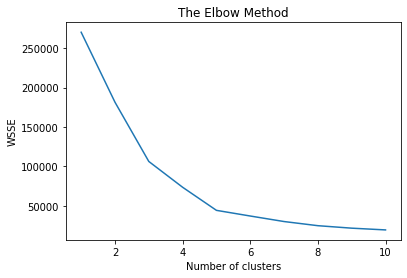

In [5]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wsse = []
for i in range(1, 11):
            kmeans= KMeans(n_clusters = i, random_state = 10)
            kmeans.fit(X)
            wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [6]:
print(wsse)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37271.8862365895, 30273.394312070042, 25022.485004530354, 21881.878507060967, 19669.710998301216]


In [7]:
kmeans=KMeans(n_clusters=5, random_state=10)
Y_pred=kmeans.fit_predict(X)

In [8]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [9]:
kmeans.n_iter_

5

In [10]:
df["Clusters"]=Y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


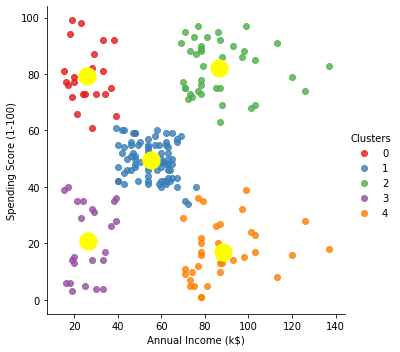

In [11]:
import seaborn as sns

sns.lmplot( data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
fit_reg=False, # No regression line
hue='Clusters',palette="Set1")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s = 300, c = 'yellow')
plt.show()

In [12]:
df["Clusters"]=df.Clusters.map({0:"Careless",1:"Standard",2:"Target",3:"Sensible",4:"Carefull"})

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,Sensible
1,2,Male,21,15,81,Careless
2,3,Female,20,16,6,Sensible
3,4,Female,23,16,77,Careless
4,5,Female,31,17,40,Sensible


In [14]:
new_df=df[df["Clusters"]=="Target"]

In [15]:
new_df.shape

(39, 6)

In [16]:
new_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
123,124,Male,39,69,91,Target
125,126,Female,31,70,77,Target
127,128,Male,40,71,95,Target
129,130,Male,38,71,75,Target
131,132,Male,39,71,75,Target
133,134,Female,31,72,71,Target
135,136,Female,29,73,88,Target
137,138,Male,32,73,73,Target
139,140,Female,35,74,72,Target
141,142,Male,32,75,93,Target


In [17]:
new_df.to_excel("TargetCustomer.xlsx",index=False)

# Linear Regression 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
data=pd.read_csv(r'C:\Users\hp\Advertising.csv',index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [20]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


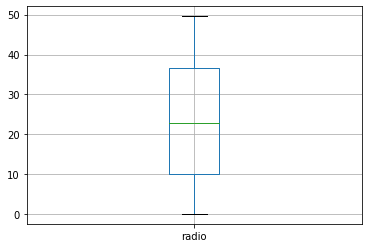

In [21]:
data.boxplot(column="radio")

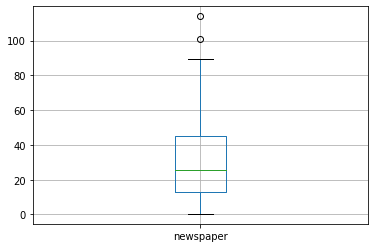

In [22]:
data.boxplot(column="newspaper")

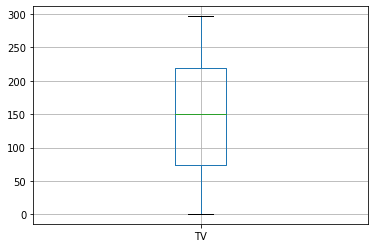

In [23]:
data.boxplot(column="TV")

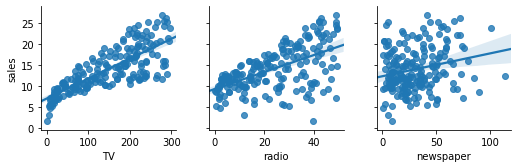

In [24]:
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",kind='reg')

In [25]:
#create X & Y
X=data[['TV','radio','newspaper']]
Y=data['sales']   

In [26]:
#x=data.drop('sales',axis=1)


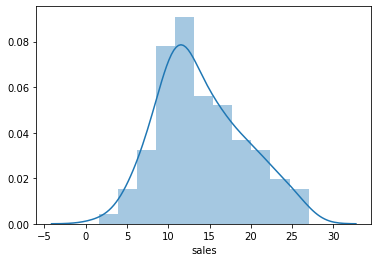

In [27]:
sns.distplot(Y,hist=True)

In [28]:
"""
#log transformation
import numpy as np
Y_log=np.log(Y)
"""

'\n#log transformation\nimport numpy as np\nY_log=np.log(Y)\n'

In [29]:
#sns.distplot(Y_log,hist=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275C5C3B508>,
      dtype=object)

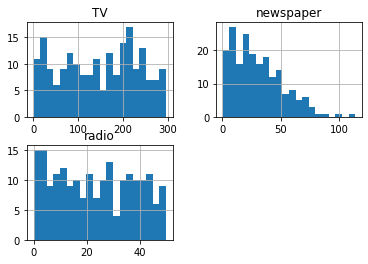

In [30]:
X.hist(bins=20)#bin will range the plot into 20

In [31]:
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))#lambda is anon it is only temp and will deallocate
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275C5E55048>,
      dtype=object)

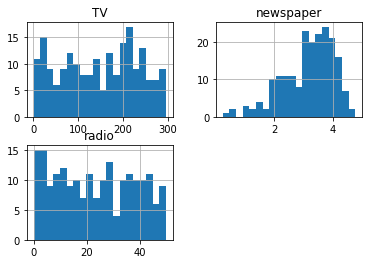

In [32]:
X.hist(bins=20)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


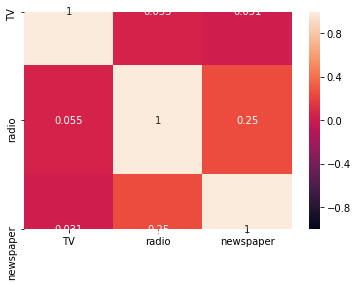

In [33]:
corr_df=X.corr(method="pearson")
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)#no corr means value is 0

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [35]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2,random_state=10)

In [36]:
print(X_train)

        TV  radio  newspaper
191   39.5   41.1   1.916923
8    120.2   19.6   2.533697
27   142.9   29.3   2.610070
139   43.0   25.9   3.068053
59   210.8   49.6   3.655840
..     ...    ...        ...
114  209.6   20.6   2.459589
65   131.1   42.8   3.397858
16   195.4   47.7   3.987130
126   87.2   11.8   3.292126
10   199.8    2.6   3.100092

[160 rows x 3 columns]


In [37]:
print(X_test)

        TV  radio  newspaper
60   210.7   29.5   2.332144
6      8.7   48.9   4.330733
21   218.4   27.7   3.996364
199  283.6   42.0   4.207673
53   216.4   41.7   3.703768
20   147.3   23.9   3.000720
163  188.4   18.1   3.280911
56   198.9   49.4   4.110874
70   216.8   43.9   3.339322
3     17.2   45.9   4.252772
99   289.7   42.3   3.955082
11    66.1    5.8   3.226844
76    16.9   43.7   4.504244
143  220.5   33.2   3.660994
125  229.5   32.3   4.320151
64   102.7   29.6   2.240710
110  255.4   26.9   1.871802
79     5.4   29.9   2.341806
112  241.7   38.0   3.186353
186  205.0   45.1   3.025291
155  187.8   21.1   2.351375
131    0.7   39.6   2.272126
62   261.3   42.7   4.019980
88   110.7   40.6   4.162003
103  280.2   10.1   3.109061
122   18.8   21.7   3.939638
137   25.6   39.0   2.332144
2     44.5   39.3   3.830813
48   239.9   41.5   2.970414
173   19.6   20.1   2.890372
160  131.7   18.4   3.572346
40   228.0   37.7   3.496508
77    27.5    1.6   3.077312
92    28.6    

In [38]:
print(Y_train)

191    10.8
8      13.2
27     15.0
139     9.6
59     23.8
       ... 
114    15.9
65     18.0
16     22.4
126    10.6
10     10.6
Name: sales, Length: 160, dtype: float64


In [39]:
print(Y_test)

60     18.4
6       7.2
21     18.0
199    25.5
53     22.6
20     14.6
163    14.9
56     23.7
70     22.3
3       9.3
99     25.4
11      8.6
76      8.7
143    20.1
125    19.7
64     14.0
110    19.8
79      5.3
112    21.8
186    22.6
155    15.6
131     1.6
62     24.2
88     16.0
103    14.8
122     7.0
137     9.5
2      10.4
48     23.2
173     7.6
160    12.9
40     21.5
77      6.9
92      7.3
36     12.8
179    11.8
128     8.8
170    15.0
47     10.6
175    11.5
Name: sales, dtype: float64


In [40]:
from sklearn.linear_model import LinearRegression
#create a model Object
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train)
#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]


In [41]:
#pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04374250157742165), ('radio', 0.193037078973453), ('newspaper', -0.048951368222487926)]


In [42]:
X1=100
X2=100
X3=0
Y_pred=3.353291385815151+(0.0437425*X1)+(0.193037078973453*X2)+(-0.048951368222487926*X3)
print(Y_pred)





27.031249283160452


In [43]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [44]:
#new_df=pd.Dataframe()
#new_df=X_test
#new_df["Actual sales"]=Y_test
#new_df["Predicted sales"]=Y_pred
#new_df

In [45]:
new_df=pd.DataFrame()
new_df=X_test
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [46]:
#from sklearn.metrics import r2_score,mean_squared_error
#import numpy as np

#r2=r2_score(Y_test,Y_pred)
#print(r2)

#rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
#print(rmse)

#adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
#print(adjusted_r_squared)""""

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.834801071903532
2.59297691109306
0.8322725168816474


In [48]:
print(min(Y_test))
print(max(Y_test))

1.6
25.5


In [49]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales prediction.xlsx",header=True,index=True)
new_df.head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [51]:
from sklearn.linear_model import Ridge
#create a model Object
lm=Ridge()
#train the model object
lm.fit(X_train,Y_train)
#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [52]:
Y_pred=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8348082644975934
2.592920462683998
0.832279819566434


In [53]:
from sklearn.linear_model import Lasso
#create a model Object
lm=Lasso()
#train the model object
lm.fit(X_train,Y_train)
#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [54]:
Y_pred_new=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8348082644975934
2.592920462683998
0.832279819566434


In [55]:
Y_pred=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8360506658527163
2.5831514271094234
0.8335412372688292


In [56]:
new_df=pd.DataFrame()
new_df=X_train
new_df["sales"]=Y_train
new_df.shape

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(160, 4)

In [57]:
import statsmodels.formula.api as sm
#create a fitted model with all the three feature
lm_model=sm.ols(formula='sales~TV+radio+newspaper',data=new_df).fit()
#print the coefficient
print(lm_model.params)
print(lm_model.summary())
#linear regression uses Ols function in backend 
#AIC akaike information criteria
#BIC bayes information Criteria

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.10e-85
Time:                        14:13:23   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [58]:
#p value is used in hypothesis
#h0 null hypothesis(there is no significant reltn between X& Y vara)
#h1 alternative Hypothesis(there is significant reltn between X& Y vara)

In [59]:
Y_pred=lm_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8360506658527163
2.5831514271094234
0.8335412372688292


In [60]:
import statsmodels.formula.api as sm
#create a fitted model with all the three feature
lm_model=sm.ols(formula='sales~TV+radio',data=new_df).fit()
#print the coefficient
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           3.47e-87
Time:                        14:13:23   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [61]:
Y_pred=lm_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8360506658527163
2.5831514271094234
0.8335412372688292


Text(0, 0.5, 'Residuals')

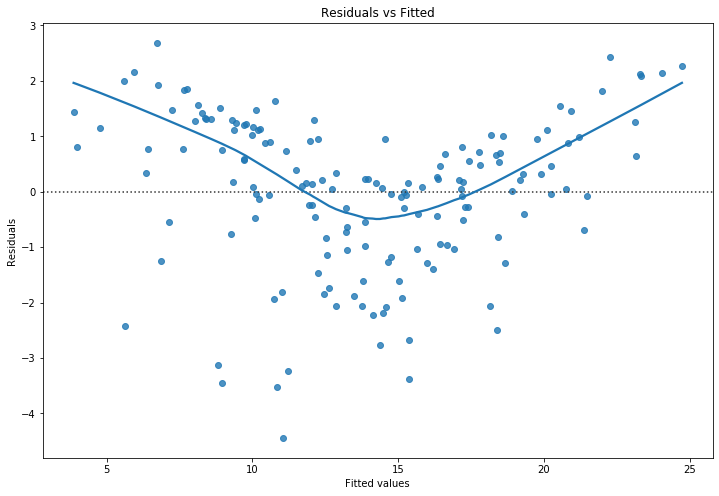

In [62]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
#error should be random can be checked using residual vs fitted 

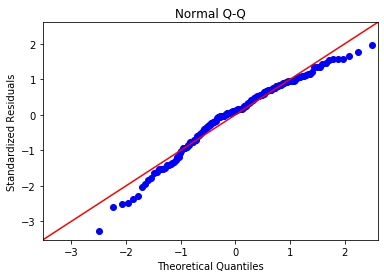

In [63]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()
#assumation state that the error should follow an approx normal distribution

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

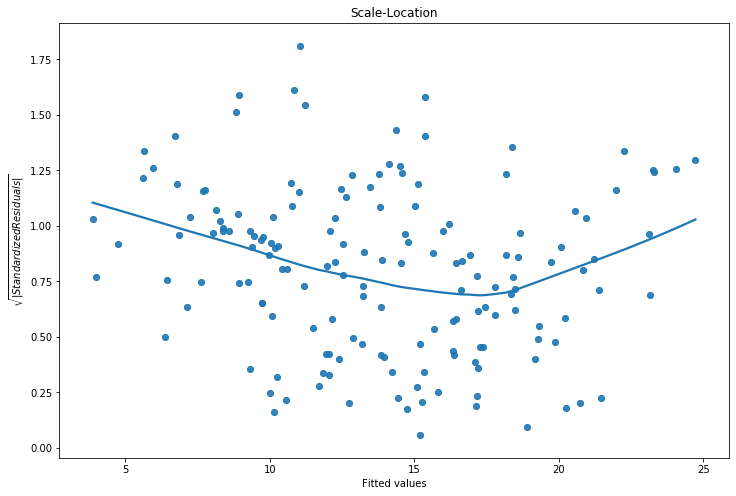

In [64]:
# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')
# assumation error should follow a constant variance (homoskedasticity )